# EDA - Ashrae

In [1]:
%cd /Users/akurzela/projects/ashrae_energy_prediction

/Users/akurzela/projects/ashrae_energy_prediction


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from src.data import get_weather_data, get_building_data, get_base_data
import seaborn as sns

df_weather = get_weather_data()
df_building = get_building_data()
df_base = get_base_data()

df_base_building = pd.merge(df_base, df_building, how="left", on=["building_id"])
df = pd.merge(
    df_base_building, df_weather, how="left", on=["site_id", "timestamp"]
)

df = df.loc[lambda d:d.meter_reading.notnull()]

In [10]:
df = df.assign(primary_use_num=lambda d: le.transform(d.primary_use))

In [48]:
df.shape

(20216100, 17)

In [6]:
df.shape

(61913700, 17)

In [57]:
df.head()

,building_id,meter,timestamp,meter_reading,row_id,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.0,NaN,0,0,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,electricity,2016-01-01 00:00:00,0.0,NaN,0,0,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,electricity,2016-01-01 00:00:00,0.0,NaN,0,0,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,electricity,2016-01-01 00:00:00,0.0,NaN,0,0,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,electricity,2016-01-01 00:00:00,0.0,NaN,0,0,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [62]:
?df.fillna

In [ ]:
df = df.fillna({'floor_count': 0, 'precip...':1})

In [8]:
pk = ['building_id', 'meter', 'timestamp']

In [9]:
df[pk].drop_duplicates().shape

(61913700, 3)

In [63]:
meter_cats = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}

df = df.assign(meter=lambda d:d.meter.replace(meter_cats))

In [64]:
meter_cats

{0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}

In [ ]:
# df['meter'] = df['meter'].replace(meter_cats)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
le.fit(df.primary_use)

LabelEncoder()

array([0, 0, 0, ..., 1, 4, 6])

In [55]:
df.primary_use

0                               Education
1                               Education
2                               Education
3                               Education
4                               Education
                        ...              
20216095    Entertainment/public assembly
20216096                        Education
20216097    Entertainment/public assembly
20216098              Lodging/residential
20216099                           Office
Name: primary_use, Length: 20216100, dtype: object

## Meter reading by meter

In [9]:
sns.boxplot(x="meter", y="meter_reading", data=df)

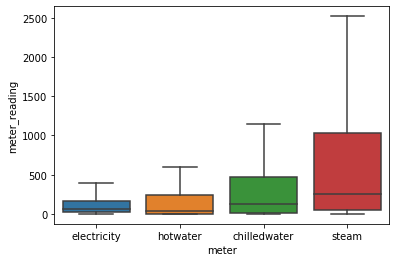

In [17]:
sns.boxplot(x="meter", y="meter_reading", data=df, showfliers=False)

In [26]:
(df.loc[lambda d:d.meter==2].meter_reading > 10000).mean()

0.009223759071496624

##  Meter reading by meter and primary_use

In [18]:
df.head()

,building_id,meter,timestamp,meter_reading,row_id,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,NaN,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,NaN,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,NaN,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,NaN,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,NaN,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


/Users/akurzela/projects/ashrae_energy_prediction/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


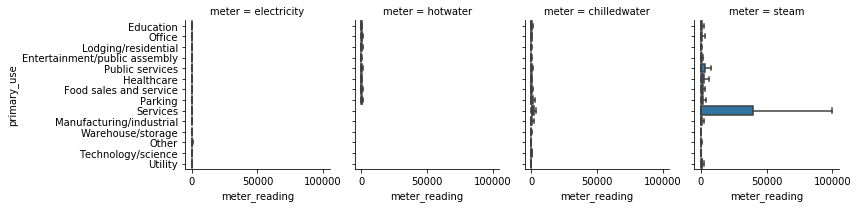

In [32]:
g = sns.FacetGrid(df, col="meter")
g.map(sns.boxplot, "meter_reading", "primary_use", showfliers=False)

/Users/akurzela/projects/ashrae_energy_prediction/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


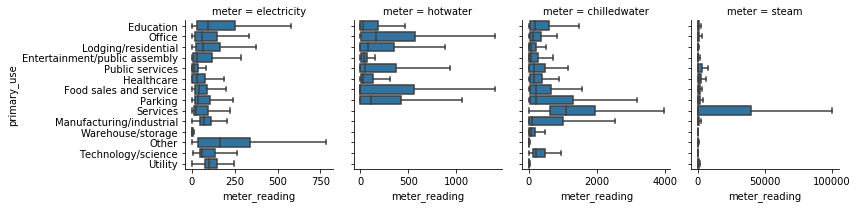

In [33]:
g = sns.FacetGrid(df, col="meter", sharex=False)
g.map(sns.boxplot, "meter_reading", "primary_use", showfliers=False)

In [37]:
df.head(3000)

,building_id,meter,timestamp,meter_reading,row_id,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.00,NaN,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,electricity,2016-01-01 00:00:00,0.00,NaN,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,electricity,2016-01-01 00:00:00,0.00,NaN,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,electricity,2016-01-01 00:00:00,0.00,NaN,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,electricity,2016-01-01 00:00:00,0.00,NaN,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,538,electricity,2016-01-01 01:00:00,3.24,NaN,3,Religious worship,10000,2010.0,NaN,9.4,NaN,2.8,0.0,1021.5,350.0,6.2
2996,539,electricity,2016-01-01 01:00:00,5.16,NaN,3,Entertainment/public assembly,1473,NaN,NaN,9.4,NaN,2.8,0.0,1021.5,350.0,6.2
2997,540,electricity,2016-01-01 01:00:00,37.29,NaN,3,Education,88300,1909.0,NaN,9.4,NaN,2.8,0.0,1021.5,350.0,6.2
2998,541,electricity,2016-01-01 01:00:00,1.12,NaN,3,Lodging/residential,2582,NaN,NaN,9.4,NaN,2.8,0.0,1021.5,350.0,6.2


In [46]:
365*24*3  *  1458  *  1.8

68969232.0

In [40]:
df.shape

(61913700, 17)

In [43]:
df.timestamp.max()

'2018-12-31 23:00:00'

In [59]:
df.loc[lambda d: d.timestamp > '2016-03-01']

,building_id,meter,timestamp,meter_reading,row_id,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
3203750,0,electricity,2016-03-01 00:00:00,0.000,NaN,0,0,7432,2008.0,NaN,20.0,2.0,8.3,0.0,1020.1,150.0,2.6
3203751,1,electricity,2016-03-01 00:00:00,0.000,NaN,0,0,2720,2004.0,NaN,20.0,2.0,8.3,0.0,1020.1,150.0,2.6
3203752,2,electricity,2016-03-01 00:00:00,0.000,NaN,0,0,5376,1991.0,NaN,20.0,2.0,8.3,0.0,1020.1,150.0,2.6
3203753,3,electricity,2016-03-01 00:00:00,0.000,NaN,0,0,23685,2002.0,NaN,20.0,2.0,8.3,0.0,1020.1,150.0,2.6
3203754,4,electricity,2016-03-01 00:00:00,0.000,NaN,0,0,116607,1975.0,NaN,20.0,2.0,8.3,0.0,1020.1,150.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,electricity,2016-12-31 23:00:00,8.750,NaN,15,1,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,electricity,2016-12-31 23:00:00,4.825,NaN,15,0,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,electricity,2016-12-31 23:00:00,0.000,NaN,15,1,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,electricity,2016-12-31 23:00:00,159.575,NaN,15,4,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [69]:
df[['floor_count','site_id']].groupby(['site_id']).mean()

,floor_count
site_id,
0,NaN
1,6.920626
2,NaN
3,NaN
4,5.394139
5,2.280899
6,NaN
7,9.099997
8,1.014831


### so the problem is that in some site_id, there is no information about floor_count at all

In [94]:
a=df.loc[lambda d: d.site_id==9]

In [95]:
a.floor_count.unique()

array([nan])

In [1]:
a.primary_use.unique()

NameError: name 'a' is not defined

In [107]:
listofvalues = df.square_feet.unique()

In [109]:
listofvalues.tolist()

[7432,
 2720,
 5376,
 23685,
 116607,
 8000,
 27926,
 121074,
 60809,
 27000,
 370773,
 49073,
 37100,
 99380,
 86250,
 83957,
 54644,
 15250,
 111891,
 18717,
 110272,
 7043,
 3569,
 130885,
 105545,
 103286,
 26953,
 59200,
 52957,
 93897,
 61904,
 48392,
 38686,
 42731,
 41617,
 53130,
 12769,
 64619,
 26944,
 93860,
 226506,
 59071,
 283,
 15304,
 9045,
 31666,
 24456,
 4698,
 387638,
 106523,
 87742,
 7867,
 16726,
 60088,
 65359,
 83379,
 81337,
 81576,
 37241,
 487433,
 80942,
 128887,
 76257,
 36240,
 156111,
 3025,
 10743,
 2070,
 4038,
 10932,
 6412,
 76527,
 161755,
 68094,
 10779,
 33370,
 29469,
 200933,
 187647,
 2260,
 18860,
 15876,
 21657,
 45330,
 50623,
 5374,
 97532,
 81580,
 56995,
 27814,
 118338,
 32206,
 100481,
 139683,
 129716,
 37265,
 15489,
 138316,
 91149,
 68211,
 150318,
 83043,
 61204,
 38319,
 16802,
 21539,
 27071,
 102774,
 102957,
 62893,
 66661,
 83108,
 64723,
 49589,
 66532,
 56467,
 64024,
 118231,
 56629,
 50020,
 44789,
 45348,
 40085,
 57673,

In [124]:
listofvalues.sort()

In [125]:
listofvalues

array([   283,    356,    366, ..., 850354, 861524, 875000])